In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import numpy as np

# Top 10 Countries by Stock Turnover Ratio in 2022

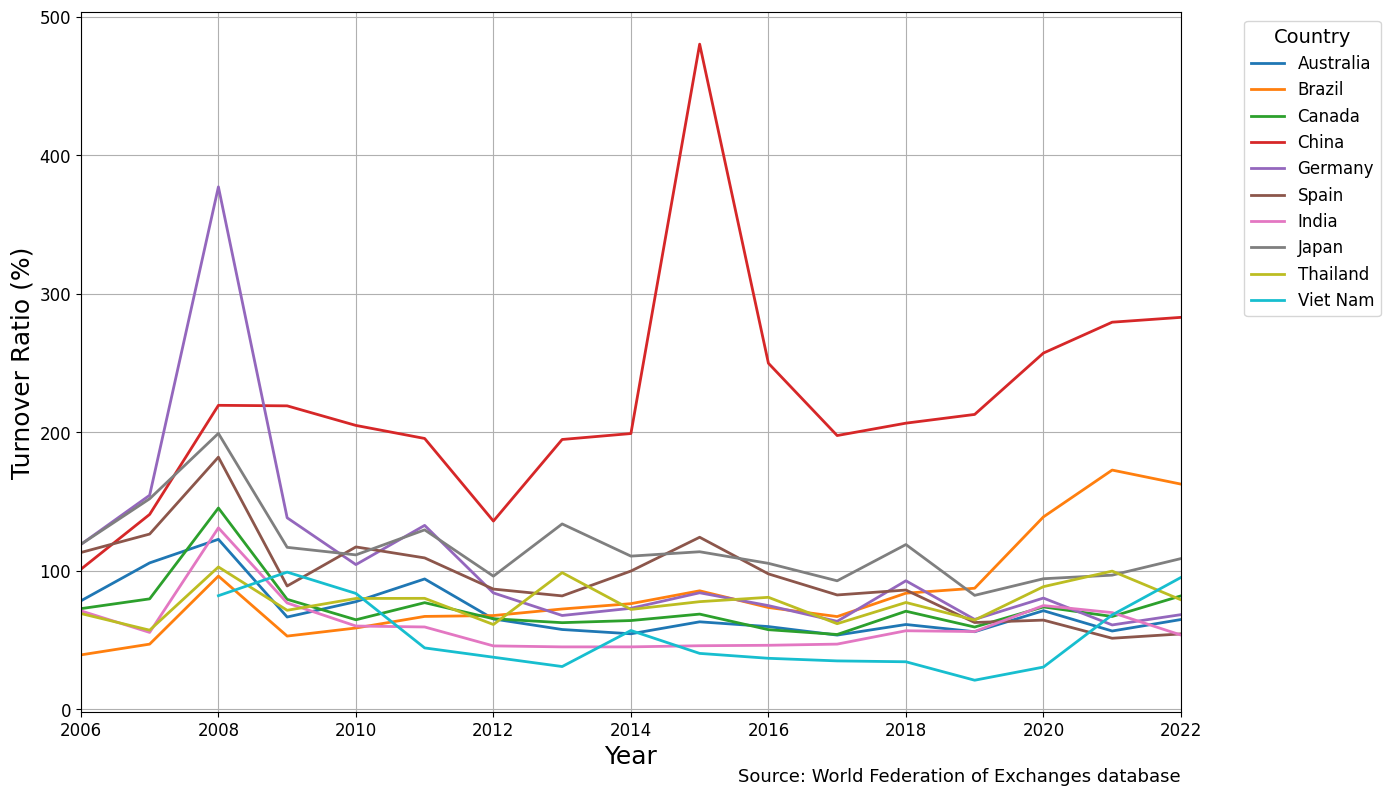

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

file_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\WDI Stocks traded, turnover ratio of domestic shares (%).csv"
df = pd.read_csv(file_path, skiprows=4)

df = df.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 69'], errors='ignore')

df_melted = df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Turnover Ratio')
df_melted = df_melted.dropna(subset=['Turnover Ratio'])
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted = df_melted.dropna(subset=['Year'])
df_melted['Year'] = df_melted['Year'].astype(int)
df_melted = df_melted[(df_melted['Year'] >= 2006) & (df_melted['Year'] <= 2022)]

valid_countries = {country.name for country in pycountry.countries}

df_melted = df_melted[df_melted['Country Name'].isin(valid_countries)]

latest_year = df_melted['Year'].max()
latest_ratios = df_melted[df_melted['Year'] == latest_year]

top10_countries = latest_ratios.sort_values('Turnover Ratio', ascending=False).head(10)['Country Name'].tolist()
df_top10 = df_melted[df_melted['Country Name'].isin(top10_countries)]

plt.figure(figsize=(14, 8))
for country in df_top10['Country Name'].unique():
    country_data = df_top10[df_top10['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Turnover Ratio'], label=country, linewidth=2)

plt.xlabel("Year", fontsize=18)
plt.ylabel("Turnover Ratio (%)", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(df_top10['Year'].min(), df_top10['Year'].max())
plt.legend(title="Country", title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(1, -0.08, "Source: World Federation of Exchanges database", transform=plt.gca().transAxes, fontsize=13, ha='right', va='top')
plt.grid(True)
plt.tight_layout()

output_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\fig1.1.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# Share of aggregate market capitalization of China’s top 100 listed firms by ownership (2010-2024)

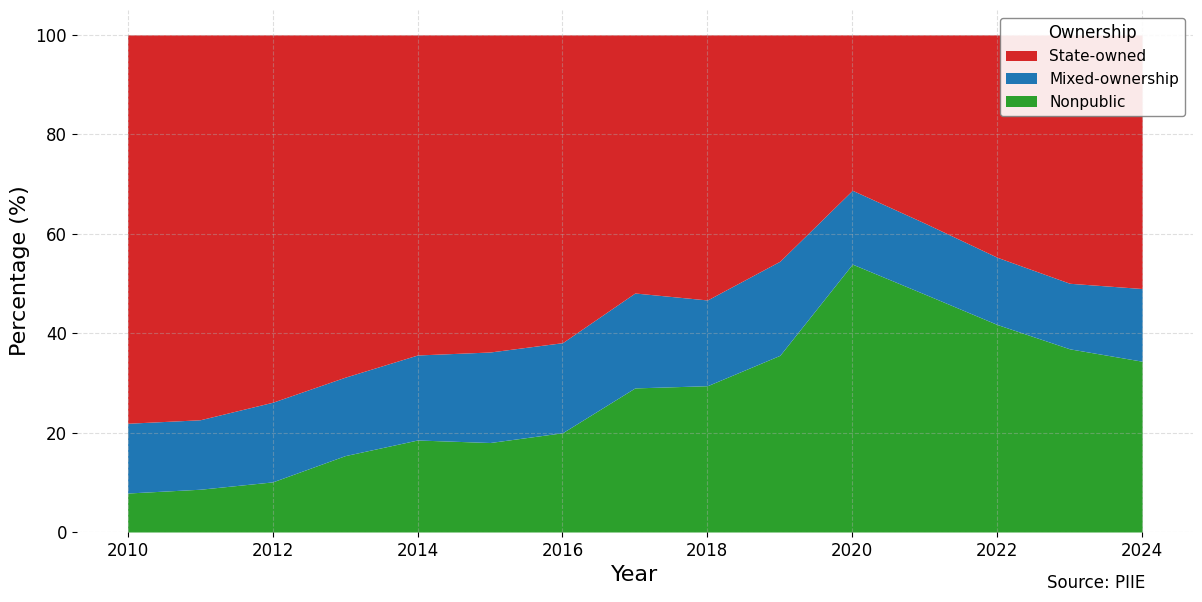

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\Mkt Cap of top 100 listed firms by ownership (2010-2024) Source PIIE.xlsx"
cntop100 = pd.read_excel(file_path, sheet_name="All rankings", skiprows=1, engine="openpyxl").drop(columns=['Name in Chinese', 'Industry'])

cntop100 = cntop100.set_index("Year")
agg = cntop100.groupby(['Year', 'Cat.'])['MkCap (bn USD)'].sum().unstack().fillna(0)
prop = agg.div(agg.sum(axis=1), axis=0) * 100
prop = prop.iloc[:-4]  # Drop last 4 rows
prop.index = prop.index.map(lambda x: str(x)[-4:])

stack_order = ['NPE', 'MOE', 'SOE']
colors = ['#2ca02c', '#1f77b4', '#d62728']

fig, ax = plt.subplots(figsize=(12, 6))
prop[stack_order].plot(kind='area', stacked=True, ax=ax, color=colors, linewidth=0)

ax.set_ylabel("Percentage (%)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.tick_params(axis='both', labelsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],  # Reverse order
    ['State-owned', 'Mixed-ownership', 'Nonpublic'],
    title="Ownership",
    frameon=True,
    framealpha=0.9,
    edgecolor='gray',
    title_fontsize=12,
    fontsize=11,
    loc='upper right'
)

ax.grid(True, linestyle='--', alpha=0.4)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('white')


fig.text(0.94, -0.02, 'Source: PIIE', ha='right', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.98, top=0.95, bottom=0.08)

output_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\fig1.3.png"
fig.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)

plt.show()

# Data distribution by Market Cap and by GICS Sector

In [22]:
file_path = r"C:\Users\hp\Favorites\Desktop\Thesis\rsoes1.csv"
rsoes = pd.read_csv(file_path)
rsoes['Date'] = pd.to_datetime(rsoes['Date'])
rsoes.set_index('Date', inplace=True)

file_path = r"C:\Users\hp\Favorites\Desktop\Thesis\All Chinese SOEs.xlsx"  
soes = pd.read_excel(file_path,  engine="openpyxl")  
soes = soes[['Identifier', 'Market Cap', 'GICS Sector Name']]

In [23]:
file_path = r"C:\Users\hp\Favorites\Desktop\Thesis\rnsoes1.csv"
rnsoes = pd.read_csv(file_path)
rnsoes['Date'] = pd.to_datetime(rnsoes['Date'])
rnsoes.set_index('Date', inplace=True)

file_path = r"C:\Users\hp\Favorites\Desktop\Thesis\All Chinese non SOEs.xlsx"  
nsoes = pd.read_excel(file_path,  engine="openpyxl")  
nsoes = nsoes[['Identifier', 'Market Cap', 'GICS Sector Name']]

# Distribution of SOEs by Market Cap

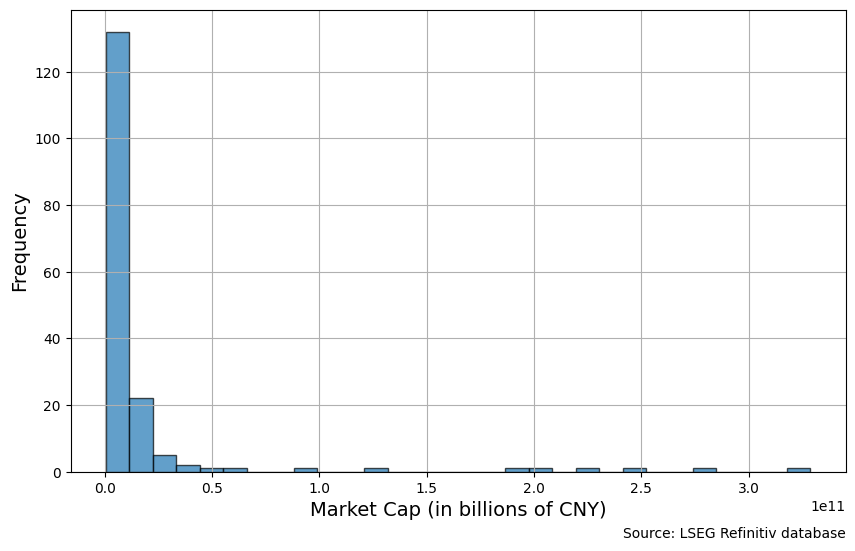

In [24]:
rsoes_identifiers = rsoes.columns.tolist()
matched_soes = soes[soes['Identifier'].isin(rsoes_identifiers)]

plt.figure(figsize=(10,6))
plt.hist(matched_soes['Market Cap'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Market Cap (in billions of CNY)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.text(1.0, -0.12, "Source: LSEG Refinitiv database", transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)

output_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\fig2.1.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)

plt.show()

# Distribution of non-SOEs by Market Cap

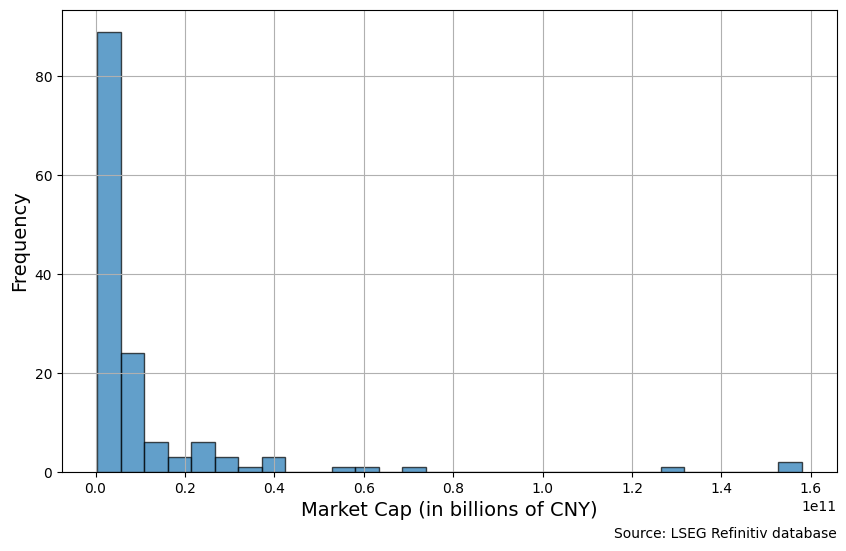

In [25]:
rnsoes_identifiers = rnsoes.columns.tolist()
matched_nsoes = nsoes[nsoes['Identifier'].isin(rnsoes_identifiers)]

plt.figure(figsize=(10,6))
plt.hist(matched_nsoes['Market Cap'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Market Cap (in billions of CNY)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.text(1.0, -0.12, "Source: LSEG Refinitiv database", transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)

output_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\fig2.2.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)

plt.show()

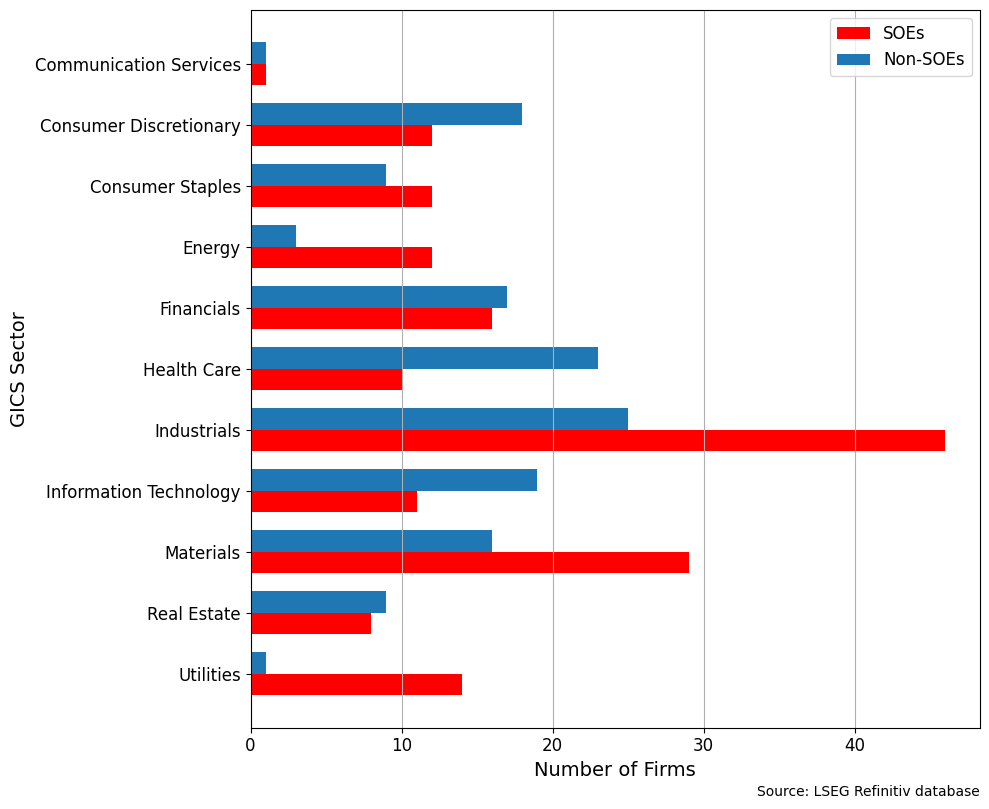

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sector_counts_soes = matched_soes['GICS Sector Name'].value_counts()
sector_counts_nsoes = matched_nsoes['GICS Sector Name'].value_counts()

all_sectors = sorted(sector_counts_soes.index.union(sector_counts_nsoes.index), reverse=True)
sector_counts_soes = sector_counts_soes.reindex(all_sectors, fill_value=0)
sector_counts_nsoes = sector_counts_nsoes.reindex(all_sectors, fill_value=0)

bar_height = 0.35
indices = range(len(all_sectors))

plt.barh(
    [i - bar_height / 2 for i in indices],
    sector_counts_soes,
    height=bar_height,
    color='red',
    label='SOEs'
)

plt.barh(
    [i + bar_height / 2 for i in indices],
    sector_counts_nsoes,
    height=bar_height,
    color='#1f77b4',
    label='Non-SOEs'
)

plt.xlabel('Number of Firms', fontsize=14)
plt.ylabel('GICS Sector', fontsize=14)
plt.yticks(ticks=indices, labels=all_sectors, fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='x')
plt.tight_layout()

plt.text(1.0, -0.08, "Source: LSEG Refinitiv database", transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)

# Save figure
output_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\fig2.3.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)

plt.show()

# Distribution of the Li Keqiang Index (2017-2025)

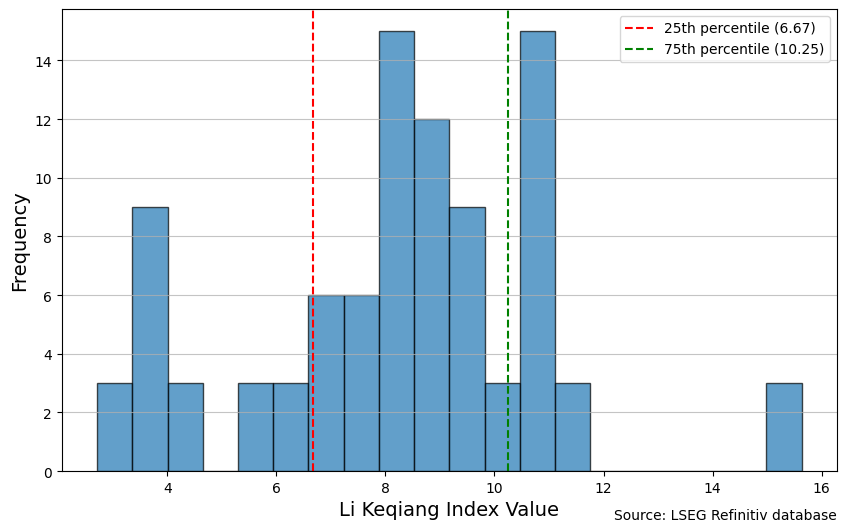

In [27]:
file_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Economic Indicator_China (Mainland) Li Keqiang index (The Economist), Chg Y_Y_15 Apr 2025.xlsx"
keqiang_index = pd.read_excel(file_path, skiprows=15, usecols="A:B", engine="openpyxl")
keqiang_index.columns = ["Date", "Keqiang Index"]
keqiang_index.set_index("Date", inplace=True)

keqiang_index.sort_index(inplace=True)  # add this before the slicing
keqiang_index = keqiang_index.loc["2017-01-01":"2025-01-01"].copy()


# Calculate dynamic thresholds
p25 = np.percentile(keqiang_index['Keqiang Index'], 25)
p75 = np.percentile(keqiang_index['Keqiang Index'], 75)

# Assign recession, expansion, neutral based on percentiles
keqiang_index['recession'] = (keqiang_index['Keqiang Index'] < p25).astype(int)
keqiang_index['expansion'] = (keqiang_index['Keqiang Index'] > p75).astype(int)
keqiang_index['neutral'] = ((keqiang_index['Keqiang Index'] >= p25) & (keqiang_index['Keqiang Index'] <= p75)).astype(int)

keqiang_index.index.name = None
keqiang_index = keqiang_index.sort_index(ascending=True)

# Create an empty list to collect new rows
monthly_rows = []

# Loop through each quarterly row and expand to months
for quarter_end, row in keqiang_index.iterrows():
    start_of_quarter = quarter_end - pd.DateOffset(months=2)
    month_ends = pd.date_range(start=start_of_quarter, end=quarter_end, freq='ME')
    for month in month_ends:
        monthly_rows.append([month, *row.values])  # unpack row values

# Create expanded monthly DataFrame
keqiang_index = pd.DataFrame(monthly_rows, columns=['Date'] + keqiang_index.columns.tolist())
keqiang_index.set_index("Date", inplace=True)

# Calculate percentiles
p25 = np.percentile(keqiang_index['Keqiang Index'], 25)
p75 = np.percentile(keqiang_index['Keqiang Index'], 75)

plt.figure(figsize=(10,6))
plt.hist(keqiang_index['Keqiang Index'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(p25, color='red', linestyle='--', label=f'25th percentile ({p25:.2f})')
plt.axvline(p75, color='green', linestyle='--', label=f'75th percentile ({p75:.2f})')
plt.xlabel('Li Keqiang Index Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.text(
    1.0, -0.08,
    "Source: LSEG Refinitiv database",
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=10
)

output_path = r"C:\Users\hp\Favorites\Desktop\Thesis\Graphs\fig2.4.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)

plt.show()